Лабораторная работа №2 студента группы 6304 Алеева Ибрагима по дисциплине "Дифференциальные уравнения"
Вариант 1 \
Дано:
$$ y'' + 2y' = 4e^{x} (\sin x + \cos x )  $$
$$ y(0) = 1 $$
$$ y'(1) = 2 $$

In [1]:
import numpy as np
import iter
import graph
import pandas
from IPython.display import display, Image

$$ \Rightarrow From = 0 $$
$$ \Rightarrow To = 1 $$

Метод сеток состоит в том, что область (From; To) заменяется дискретной областью — массивом из N точек

In [2]:
From = 0
To = 1
N = int(3)
if N == 1:
    raise ValueError('To less points. Must be greater than 1 .')
H = (To - From) / (N - 1)
Points = [ a*H + From for a in range(N) ]
print(f"{len(Points)=}\t{N=}\n{Points=}")


len(Points)=3	N=3
Points=[0.0, 0.5, 1.0]


Соответственно:
$$ L(y) \equiv y'' + p(x) y' +q(x) y = f(x) $$
$$ \Rightarrow p(x) = 2 $$
$$ \Rightarrow q(x) = 0 $$
$$ \Rightarrow f(x) = 4e^{x} (\sin x + \cos x ) $$
$$ l_\alpha(y) = \alpha_0 y(From) + \alpha_1 y'(From) = A $$
$$ \Rightarrow \alpha_0 = 1 $$
$$ \Rightarrow \alpha_1 = 0 $$
$$ \Rightarrow A = 1 $$
$$ l_\beta(y) = \beta_0 y(To) + \beta_1 y'(To) = B $$
$$ \Rightarrow \beta_0 = 0 $$
$$ \Rightarrow \beta_1 = 1 $$
$$ \Rightarrow B = 2 $$

In [6]:
def err_runge(N: int):
	delta_max:float = 0
	iter.regen_grid(N)
	Yi = iter.iter(N)
	iter.regen_grid(N*2)
	Y2i = iter.iter(2*N)
	for i in range(N):
		delta = abs(Yi[i] - Y2i[i*2])
		if delta > delta_max:
			delta_max = delta
	return delta_max / (2**1 - 1)

def err_common(N: int):
	delta_max:float = 0
	Points = [ a*H + From for a in range(N) ]	
	iter.regen_grid(N)
	Yi = iter.iter(N)
	YYi = [ iter.ASolution(x) for x in Points ]
	for i in range(N):
		delta = abs(Yi[i] - YYi[i])
		if delta > delta_max:
			delta_max = delta
	return delta_max

In [9]:
def main():
	global N, Points
	while err_runge(N) > 0.1:
		N = N * 2
	iter.save_csv(N, 'data.csv')
	graph.draw_pic('data.csv', 'fig.svg')
	graph.draw_pic('data.csv', 'fig.jpeg')
	print(f"{err_common(N)=}\t{err_runge(N)=}\t{N=}")
	display(Image('fig.jpeg'))
	print(pandas.read_csv('data.csv',sep='\t', names=["X", "Прогонка", "F", "Левая часть", "Решение"])[0:20])


err_common(N)=1.6058524002946787e+20	err_runge(N)=0.08962850255604149	N=96


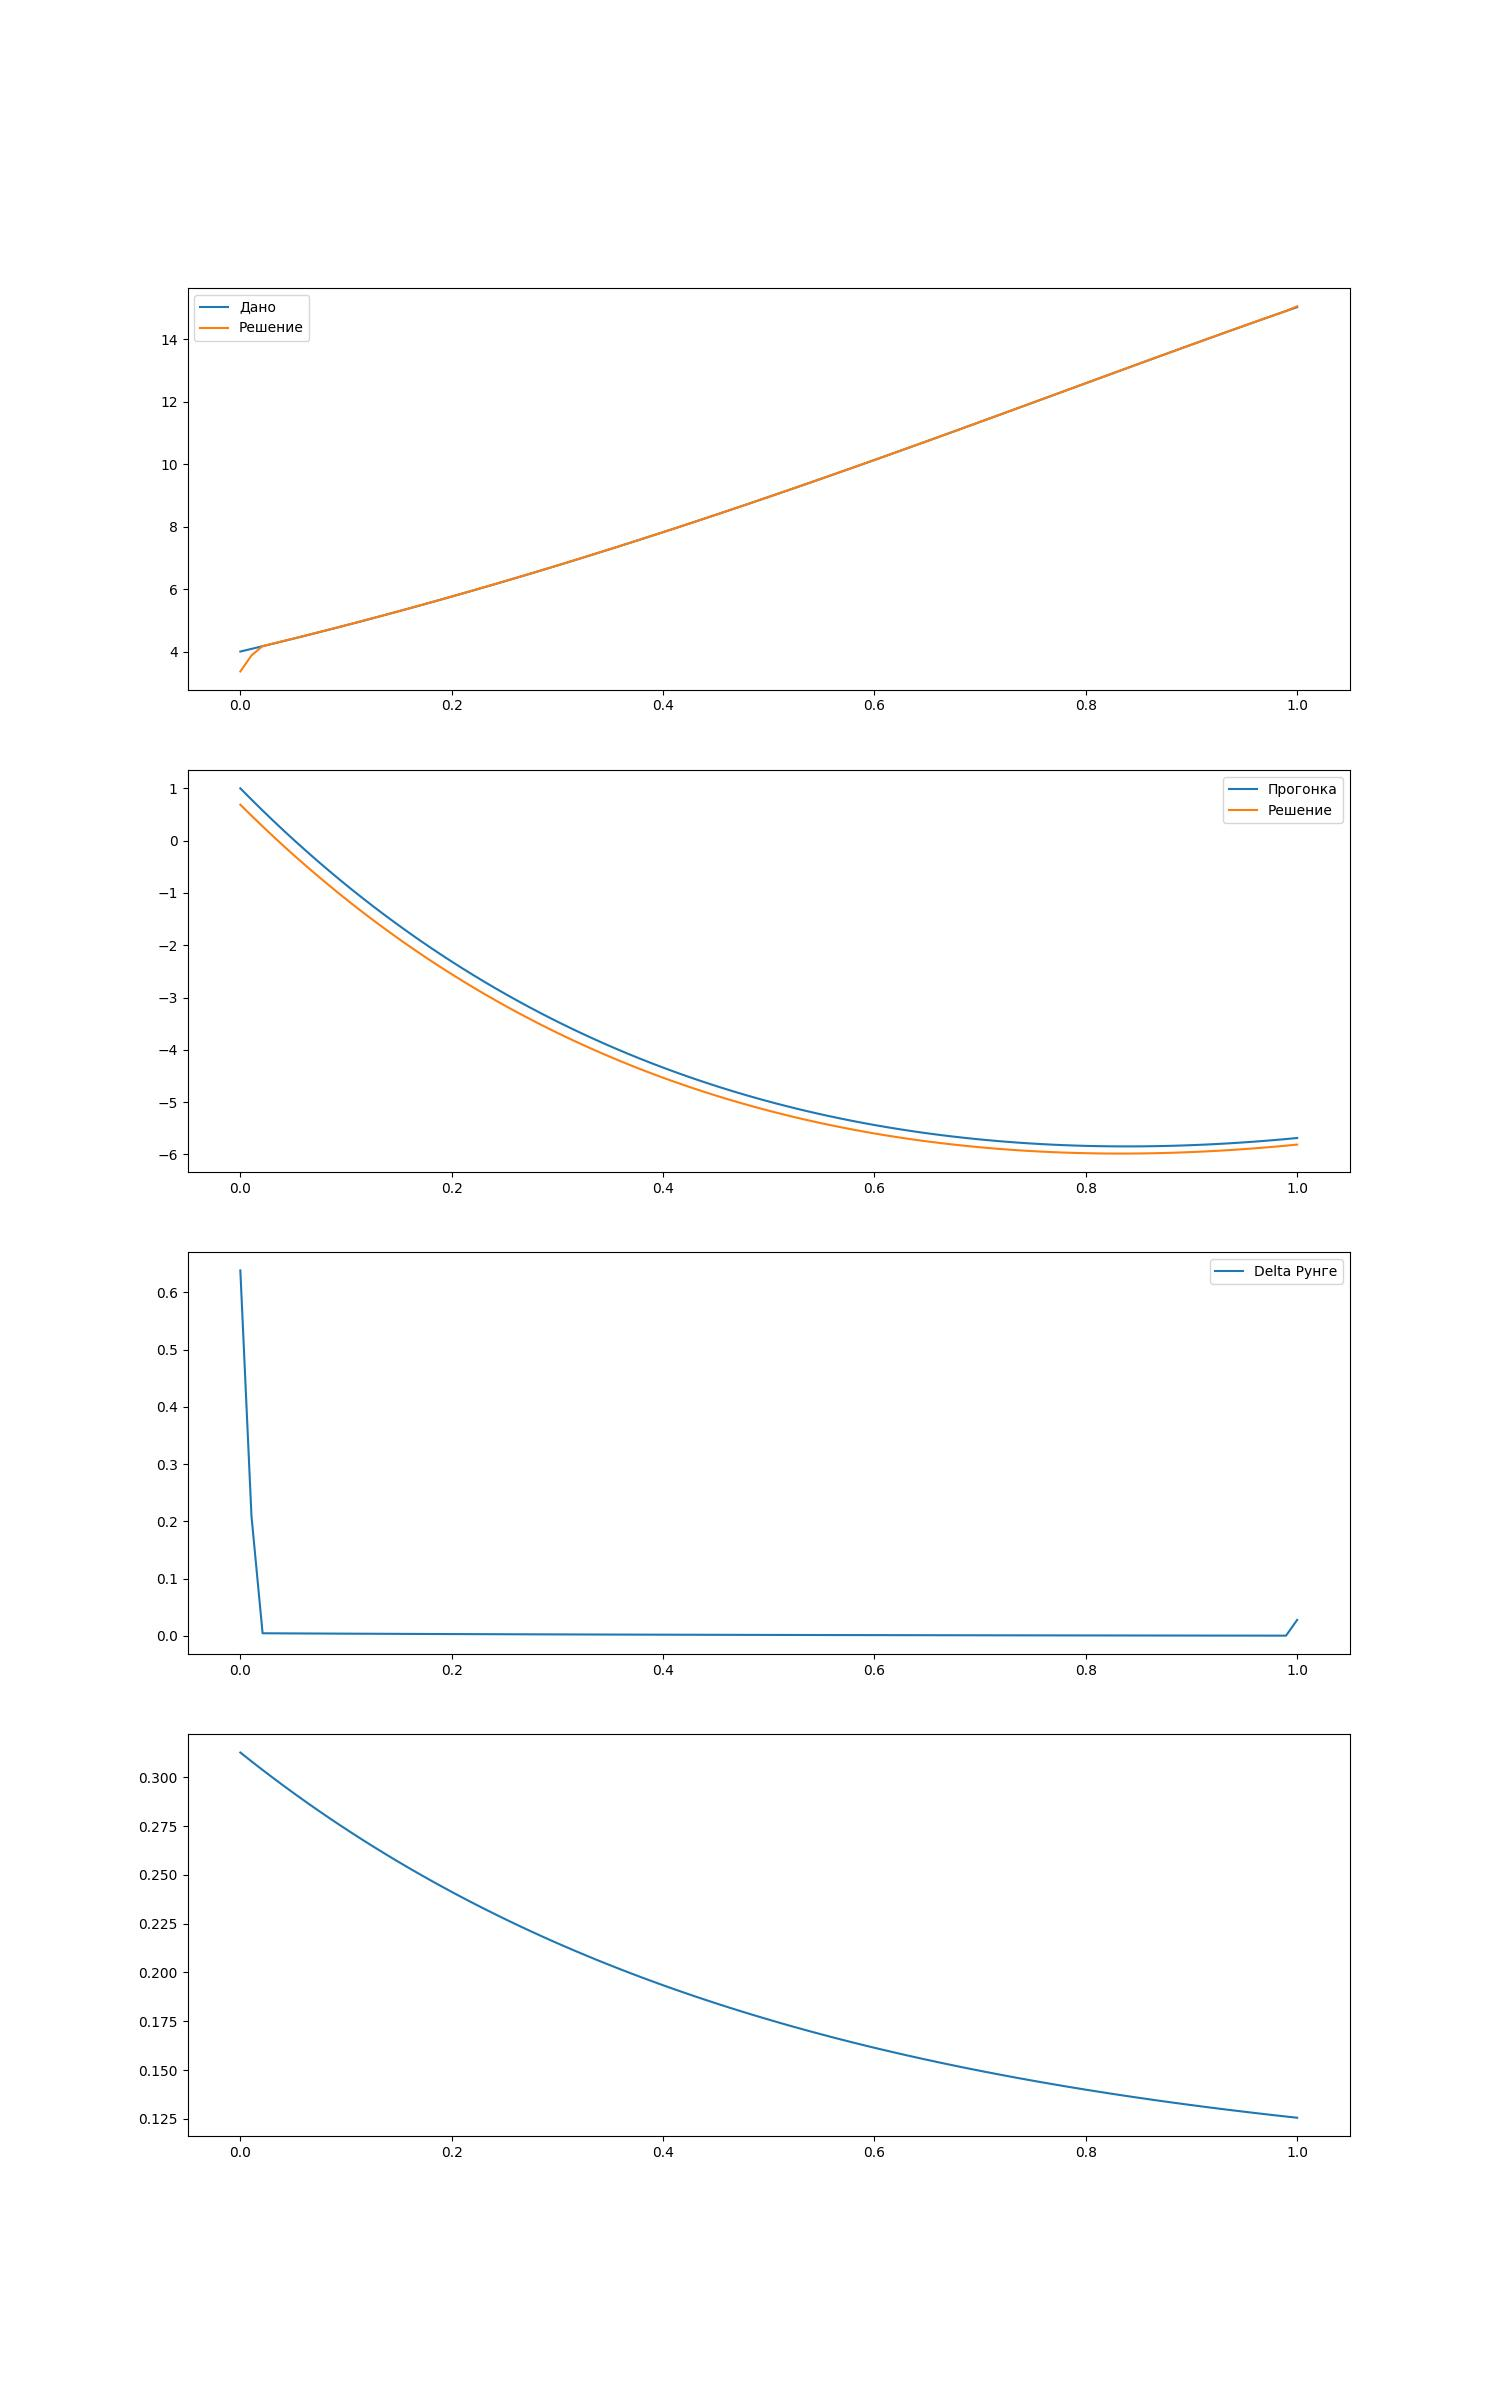

           X  Прогонка         F  Левая часть   Решение
0   0.000000  1.000000  0.687313     4.000000  3.361521
1   0.010526  0.785863  0.477689     4.084654  3.875064
2   0.021053  0.576635  0.272879     4.170194  4.174779
3   0.031579  0.372224  0.072794     4.256620  4.261110
4   0.042105  0.172538 -0.122656     4.343931  4.348328
5   0.052632 -0.022512 -0.313559     4.432128  4.436432
6   0.063158 -0.213013 -0.499998     4.521208  4.525422
7   0.073684 -0.399048 -0.682057     4.611171  4.615297
8   0.084211 -0.580703 -0.859818     4.702015  4.706055
9   0.094737 -0.758057 -1.033361     4.793739  4.797695
10  0.105263 -0.931191 -1.202762     4.886341  4.890214
11  0.115789 -1.100182 -1.368099     4.979819  4.983610
12  0.126316 -1.265107 -1.529445     5.074171  5.077882
13  0.136842 -1.426039 -1.686873     5.169393  5.173027
14  0.147368 -1.583052 -1.840455     5.265484  5.269041
15  0.157895 -1.736216 -1.990260     5.362440  5.365922
16  0.168421 -1.885601 -2.136356     5.460257  5

In [10]:
if __name__ == '__main__':
	main()